In [1]:
import pandas as pd

In [4]:
eval_df = pd.read_csv('abt_buy/deeper-eval.csv')

In [5]:
eval_df['impact'].mean()

0.036167371466726016

In [7]:
eval_df['drop'].mean()

0.08557538063680571

In [8]:
eval_df['t_good'].mean()

5.701980859114178

In [10]:
eval_df['t_bad'].mean()

3.91542399287781

In [20]:
ml = eval_df.loc[(eval_df['label']==1)]
ml.head()

,Unnamed: 0,match,e_score,drop,n_drop,perturb,flip,impact,n_impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,t_good,t_bad
0,0,0,1.0,0.043538,0.044557,drop,0,0,0,['description'],1,0.97714,942-949,10,4,1,2,2
1,1,0,1.0,0.038137,0.039029,sample,0,0,0,['description'],1,0.97714,942-949,10,4,1,2,2
2,2,0,1.0,0.043538,0.044557,drop,0,0,0,['description'],1,0.97714,942-949,20,4,1,2,2
3,3,0,1.0,0.014802,0.015148,sample,0,0,0,['description'],1,0.97714,942-949,20,4,1,2,2
4,4,0,1.0,0.043538,0.044557,drop,0,0,0,['description'],1,0.97714,942-949,30,4,1,2,2


In [22]:
nl = eval_df.loc[(eval_df['label']==0)]
nl.head()

,Unnamed: 0,match,e_score,drop,n_drop,perturb,flip,impact,n_impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,t_good,t_bad
10,10,0,0.75,0.034365,0.034953,drop,0,0,0,['description'],1,0.983161,643-636,10,4,0,1,3
11,11,0,0.75,-0.011194,-0.011386,sample,0,0,0,['description'],1,0.983161,643-636,10,4,0,1,3
12,12,0,0.75,0.034365,0.034953,drop,0,0,0,['description'],1,0.983161,643-636,20,4,0,1,3
13,13,0,0.75,0.012848,0.013069,sample,0,0,0,['description'],1,0.983161,643-636,20,4,0,1,3
14,14,0,0.75,0.034365,0.034953,drop,0,0,0,['description'],1,0.983161,643-636,30,4,0,1,3


In [23]:
tp = ml.loc[(ml['match']==1)]
tp.head()

,Unnamed: 0,match,e_score,drop,n_drop,perturb,flip,impact,n_impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,t_good,t_bad
124,124,1,1.0,0.206760,0.344196,drop,1,1,1,"['name', 'price']",2,0.600706,599-545,10,10,1,10,0
125,125,1,1.0,0.188018,0.312995,sample,1,1,1,"['name', 'price']",2,0.600706,599-545,10,10,1,10,0
126,126,1,1.0,0.207070,0.344712,drop,1,1,1,['name'],1,0.600706,599-545,20,20,1,20,0
127,127,1,1.0,0.538674,0.896735,sample,1,1,1,['name'],1,0.600706,599-545,20,20,1,20,0
128,128,1,1.0,0.224801,0.374228,drop,1,1,1,"['name', 'description']",2,0.600706,599-545,30,30,1,30,0


In [43]:
fn = ml.loc[(ml['match']==0)]
fn.head()

,Unnamed: 0,match,e_score,drop,n_drop,perturb,flip,impact,n_impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,t_good,t_bad
0,0,0,1.0,0.043538,0.044557,drop,0,0,0,['description'],1,0.97714,942-949,10,4,1,2,2
1,1,0,1.0,0.038137,0.039029,sample,0,0,0,['description'],1,0.97714,942-949,10,4,1,2,2
2,2,0,1.0,0.043538,0.044557,drop,0,0,0,['description'],1,0.97714,942-949,20,4,1,2,2
3,3,0,1.0,0.014802,0.015148,sample,0,0,0,['description'],1,0.97714,942-949,20,4,1,2,2
4,4,0,1.0,0.043538,0.044557,drop,0,0,0,['description'],1,0.97714,942-949,30,4,1,2,2


In [38]:
tn = nl.loc[(nl['match']==0)]
tn.head()

,Unnamed: 0,match,e_score,drop,n_drop,perturb,flip,impact,n_impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,t_good,t_bad
10,10,0,0.75,0.034365,0.034953,drop,0,0,0,['description'],1,0.983161,643-636,10,4,0,1,3
11,11,0,0.75,-0.011194,-0.011386,sample,0,0,0,['description'],1,0.983161,643-636,10,4,0,1,3
12,12,0,0.75,0.034365,0.034953,drop,0,0,0,['description'],1,0.983161,643-636,20,4,0,1,3
13,13,0,0.75,0.012848,0.013069,sample,0,0,0,['description'],1,0.983161,643-636,20,4,0,1,3
14,14,0,0.75,0.034365,0.034953,drop,0,0,0,['description'],1,0.983161,643-636,30,4,0,1,3


In [42]:
fp = nl.loc[(nl['match']==1)]
fp.head()

,Unnamed: 0,match,e_score,drop,n_drop,perturb,flip,impact,n_impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,t_good,t_bad
334,334,1,1.00,0.334074,0.557792,drop,1,1,1,"['name', 'description']",2,0.598922,49-225,10,10,0,10,0
335,335,1,1.00,0.502230,0.838556,sample,1,1,1,"['name', 'description']",2,0.598922,49-225,10,10,0,10,0
336,336,1,0.95,0.334074,0.557792,drop,1,1,1,"['name', 'description']",2,0.598922,49-225,20,20,0,18,2
337,337,1,0.95,0.590133,0.985325,sample,1,1,1,"['name', 'description']",2,0.598922,49-225,20,20,0,18,2
338,338,1,0.90,0.334074,0.557792,drop,1,1,1,"['name', 'description']",2,0.598922,49-225,30,30,0,25,5


/home/tteofili/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


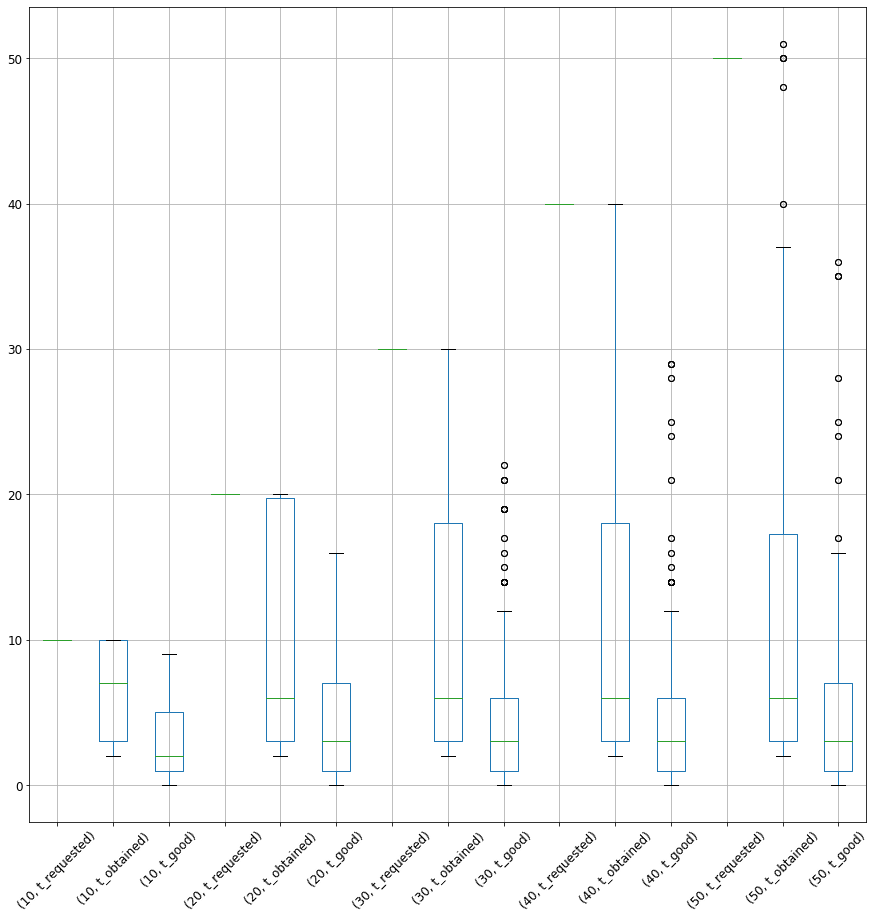

In [52]:
fn[['t_requested', 't_obtained', 't_good']].groupby('t_requested').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))

/home/tteofili/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


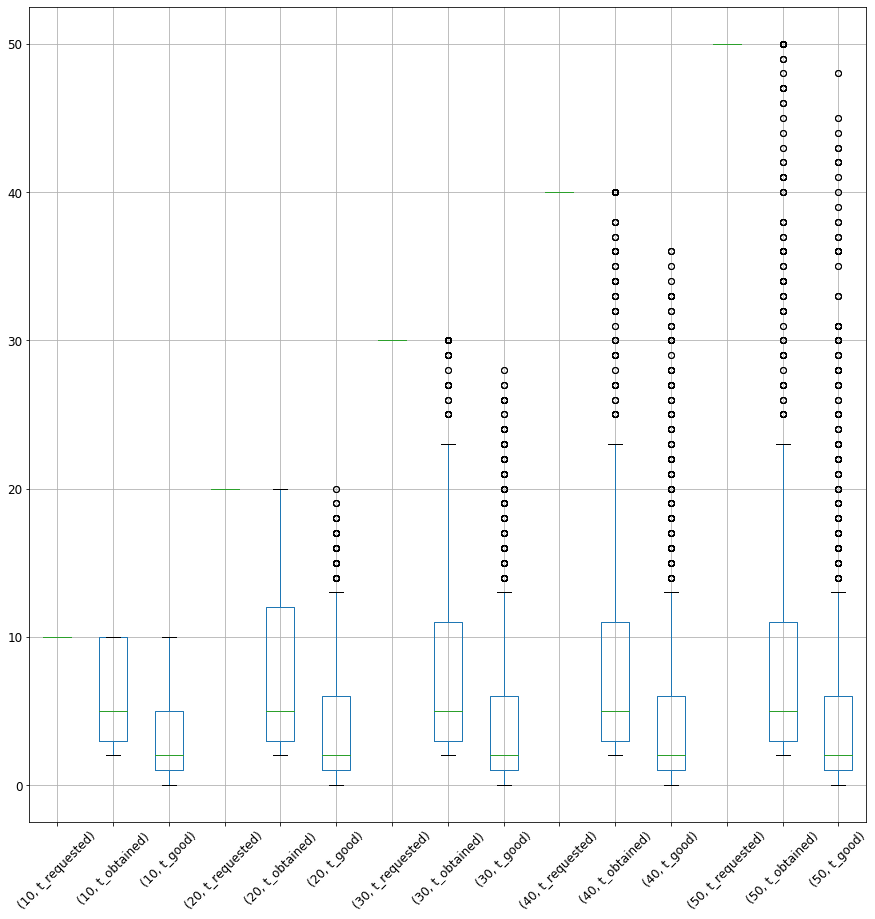

In [51]:
tn[['t_requested', 't_obtained', 't_good']].groupby('t_requested').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))

/home/tteofili/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


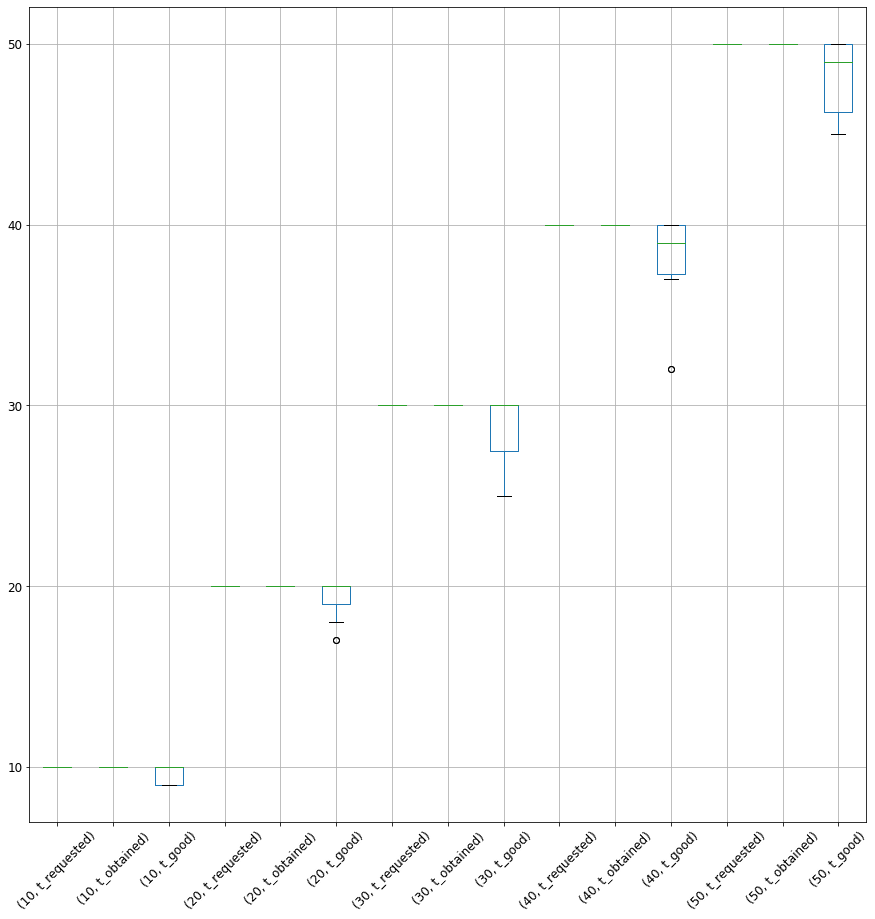

In [53]:
tp[['t_requested', 't_obtained', 't_good']].groupby('t_requested').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))

/home/tteofili/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


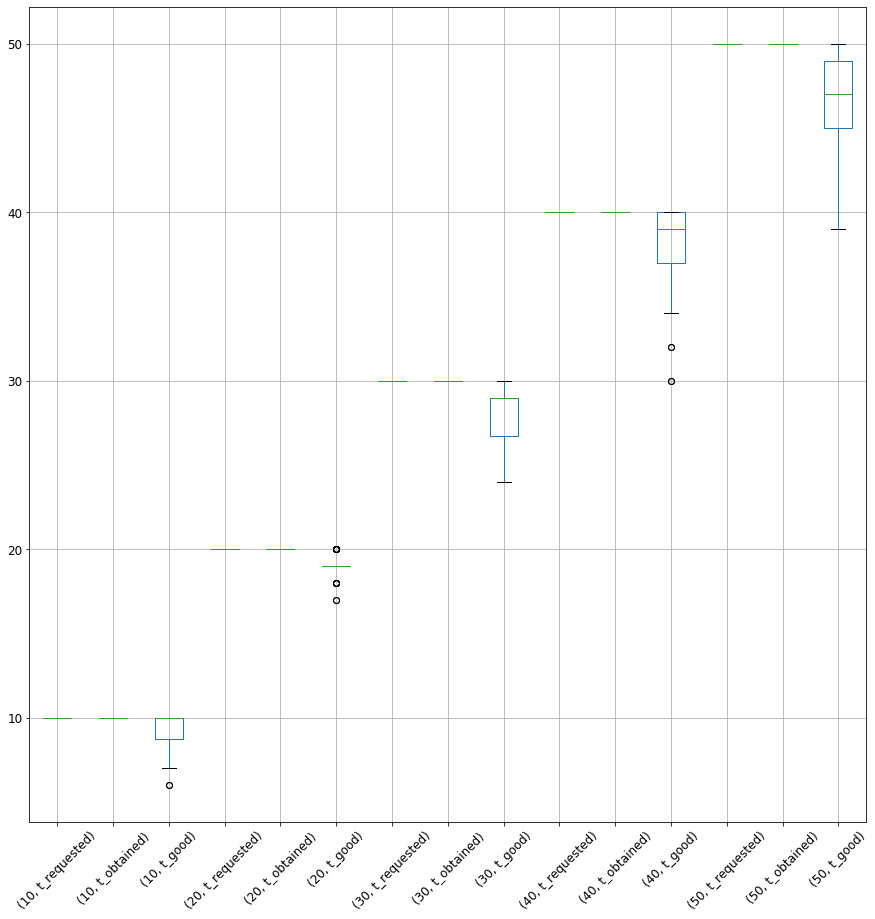

In [54]:
fp[['t_requested', 't_obtained', 't_good']].groupby('t_requested').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))